In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

Using TensorFlow backend.


In [3]:
max_features = 20000
# 20000번째로 많이 사용되는 단어까지만 데이터셋에 포함시킵니다. (즉 단어의 종류도 20000개라는 뜻입니다.)
text_max_words = 200
# 리뷰 당 단어 수를 200개로 제한합니다. 넘치는 단어들은 잘라냅니다.

In [4]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# x_* 변수는 영화 리뷰를 담는 리스트이고
# 각각의 리뷰는 단어들의 리스트입니다.
# y_* 변수는 영화 리뷰의 긍정 부정을 나타내는 값들의 리스트입니다.
# *_train 변수는 훈련 셋이고 *_test 셋은 테스트 셋 입니다
print(len(x_train), len(y_train), len(x_test), len(y_test))
# num_words 가 20000이라고 데이터셋이 20000개라는 뜻은 아닙니다.
# 데이터셋은 각각 25000개 입니다.
print(y_train)

25000 25000 25000 25000
[1 0 0 ... 0 1 0]


In [5]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

# 훈련 셋은 데이터 셋에서 20000개 까지,
# 검증(validation) 셋은 데이터 셋에서 5000개 까지로 나눕니다.
print(len(x_train), len(y_train), len(x_val), len(y_val))

for review in x_train:
    print(len(review))
# 현재는 각각의 리뷰의 단어 수가 모두 다릅니다.

20000 20000 5000 5000
218
189
141
550
147
43
123
562
233
130
450
99
117
238
109
129
163
752
212
177
129
140
256
888
93
142
220
193
171
221
174
647
233
162
597
234
51
336
139
231
704
142
861
132
122
570
55
214
103
186
113
169
469
138
302
766
351
146
59
206
107
152
186
431
147
684
383
324
252
263
787
211
314
118
390
132
710
306
167
115
95
158
156
82
502
314
190
174
60
145
214
659
408
515
461
202
238
170
107
171
158
145
790
258
287
67
123
975
775
236
195
274
214
91
1038
815
183
206
50
118
147
141
60
56
439
439
213
144
533
303
203
563
129
153
55
92
174
187
183
165
78
198
156
223
127
61
362
84
57
176
159
57
159
165
213
194
149
130
203
19
98
466
525
130
322
153
408
215
472
143
136
354
260
319
125
209
282
810
142
240
148
198
193
123
128
103
479
345
263
165
205
333
184
92
177
335
120
121
259
180
160
114
59
343
513
133
206
152
206
572
153
139
151
129
129
196
433
199
140
311
151
200
584
127
513
781
932
526
161
646
135
52
267
174
185
219
81
219
131
153
270
644
155
546
284
85
293
155
358
45
231
12

222
107
605
74
295
158
498
469
117
51
274
149
61
118
457
265
209
45
229
349
595
445
158
284
111
146
158
468
54
538
237
164
237
197
593
115
111
122
250
163
224
275
659
336
201
197
601
104
185
435
538
128
167
234
220
335
398
46
491
809
163
108
746
126
175
116
433
220
823
153
135
110
52
644
231
485
53
338
334
176
173
144
165
61
226
481
122
159
164
470
829
143
105
416
315
197
408
362
254
331
68
107
54
534
282
162
71
688
133
71
122
116
178
659
223
140
303
423
191
989
333
136
832
1021
385
139
164
277
232
999
170
201
173
147
158
167
55
116
44
708
195
214
123
123
328
402
51
110
243
223
204
211
150
240
146
211
134
370
475
43
188
149
292
350
539
156
249
189
162
155
102
51
130
168
588
295
146
265
231
67
695
193
155
302
137
422
309
58
184
133
133
148
126
436
103
154
95
127
111
782
279
362
119
140
171
820
151
64
253
161
171
370
199
120
96
307
169
145
342
210
344
193
294
52
660
56
271
760
85
129
124
467
110
495
502
223
256
47
121
149
375
118
850
247
109
132
130
176
300
200
121
147
319
727
176
177
20

118
479
50
293
183
107
160
83
168
138
193
126
199
315
123
263
136
202
53
99
253
130
156
290
122
960
243
77
115
565
178
563
122
165
293
133
200
50
260
297
26
195
205
217
114
387
246
74
325
148
83
508
374
192
135
40
161
159
136
216
212
307
127
319
106
310
108
173
230
263
163
570
288
202
401
121
93
214
184
134
413
272
62
139
310
390
218
221
135
168
131
138
131
163
273
150
112
282
452
56
206
138
63
133
125
184
294
811
349
199
365
568
65
137
162
152
305
96
150
139
134
321
443
122
149
87
136
134
95
181
794
607
188
522
127
681
104
155
565
215
100
55
611
191
132
117
200
152
162
95
598
338
90
57
327
200
580
290
441
212
313
238
125
578
119
319
228
135
752
181
156
63
191
236
116
304
144
144
323
164
279
235
197
245
118
193
383
157
111
378
295
134
94
134
149
139
158
45
212
100
279
268
319
122
265
220
217
329
187
334
168
92
132
189
382
613
233
63
150
393
120
135
47
264
169
409
197
397
415
129
213
158
484
138
145
491
61
205
154
196
441
116
341
147
421
613
270
134
154
70
117
335
146
72
203
141
124
263

340
300
176
232
198
815
172
486
262
149
430
178
89
138
309
425
127
138
401
122
1023
137
243
192
113
85
203
107
528
190
386
140
309
145
253
257
270
194
123
92
99
140
123
265
131
303
180
157
166
156
157
121
92
155
120
223
265
214
571
255
320
296
118
232
501
129
179
117
184
251
235
235
116
140
405
366
200
149
91
119
137
82
138
282
136
549
147
218
152
183
172
152
136
331
71
227
196
78
183
446
116
145
132
110
213
142
55
154
156
98
410
70
46
446
472
334
125
380
245
719
169
277
217
124
136
249
389
104
282
270
145
109
218
125
168
269
130
134
233
191
140
201
454
116
60
170
367
207
808
97
123
281
100
660
595
187
170
126
299
162
88
249
116
155
369
712
121
204
563
106
597
150
529
127
127
134
301
91
348
147
623
150
370
116
73
45
408
573
169
47
177
77
332
142
138
123
128
205
50
80
282
88
304
433
212
162
152
204
49
79
427
551
259
361
175
329
151
512
274
139
186
250
169
112
132
223
145
239
174
571
104
758
92
208
198
140
479
156
309
60
141
143
119
399
115
336
380
154
256
987
44
132
191
309
272
271
158


135
190
210
459
50
120
692
130
455
232
166
193
222
140
448
799
444
309
164
132
279
128
211
368
246
114
842
188
290
230
142
203
141
435
843
267
205
334
62
56
337
93
361
159
537
103
129
147
811
199
216
146
531
142
240
154
77
257
262
244
713
211
113
209
155
110
92
235
250
163
322
170
162
273
330
131
174
108
304
53
123
88
234
269
184
125
122
135
119
136
121
167
31
138
140
491
171
133
145
162
180
129
187
258
134
113
67
249
170
116
194
172
916
262
260
180
196
112
269
404
252
152
159
409
111
471
155
147
955
186
349
219
138
172
179
174
242
117
171
356
233
166
365
388
83
144
132
200
173
325
216
345
159
120
386
195
125
118
90
155
76
109
163
103
125
289
758
229
246
423
130
210
48
271
219
235
137
113
60
56
230
61
561
133
329
155
166
565
150
163
489
150
322
455
95
171
135
120
198
312
326
68
211
551
71
128
126
132
69
253
181
150
40
176
135
227
122
183
79
253
506
172
58
88
481
271
121
127
400
59
231
677
181
417
137
139
109
116
642
129
743
158
104
159
115
230
576
289
271
199
113
211
516
114
177
110
12

254
156
308
123
236
47
287
396
291
66
274
158
133
289
136
77
153
191
246
142
53
49
114
400
155
154
404
140
208
177
155
126
634
672
146
289
114
117
183
63
80
565
337
171
173
83
297
77
219
119
243
696
202
140
251
120
166
62
168
127
160
93
446
174
228
236
138
494
175
137
974
122
237
212
154
377
439
215
113
112
171
933
193
208
128
171
433
281
100
155
165
188
123
223
179
271
97
206
430
202
176
136
472
70
105
387
309
333
635
192
50
427
115
147
301
75
287
184
158
59
159
276
274
291
260
110
127
240
212
122
159
143
62
115
243
126
435
113
168
282
192
300
466
144
145
602
121
334
121
53
189
314
113
254
126
21
364
776
46
217
150
116
181
633
365
139
184
460
349
350
777
134
153
148
64
117
74
132
155
324
293
236
141
473
733
175
117
136
363
86
246
52
158
140
278
123
598
89
240
424
174
289
515
90
291
112
122
182
236
132
150
680
245
492
469
618
138
110
174
149
129
178
69
208
254
50
96
249
89
119
111
223
378
248
447
155
313
191
499
187
481
165
171
96
102
203
201
295
373
514
113
808
61
164
199
197
278
256


54
130
396
920
165
315
175
260
414
105
321
968
397
65
108
115
124
141
492
443
399
110
152
137
258
183
320
132
123
66
176
150
123
107
297
122
132
140
172
217
263
309
199
740
237
122
67
198
53
379
153
263
155
146
202
158
155
165
128
178
379
477
140
407
135
103
201
339
147
161
135
551
85
99
296
257
152
140
502
248
130
373
212
163
244
152
512
190
206
234
156
184
298
237
427
203
171
152
86
219
141
152
590
220
160
430
230
337
82
107
278
227
188
143
234
182
486
239
47
163
73
820
477
228
204
230
223
159
193
116
332
148
141
347
139
208
62
147
271
86
272
128
98
234
174
179
501
160
1000
262
466
136
340
171
125
168
303
225
205
113
193
125
120
239
123
77
130
240
418
146
123
170
226
418
117
291
94
581
142
206
189
225
125
141
159
196
184
174
137
140
160
172
252
457
76
137
189
159
408
108
199
170
396
209
74
315
70
71
187
429
195
299
253
463
525
729
165
165
403
784
257
87
149
177
324
137
439
243
90
158
307
133
442
350
143
441
164
56
362
153
246
170
225
116
249
274
200
254
92
452
403
65
188
177
104
156


In [6]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)
# 각 리뷰당의 단어 수를 모두 200개로 맞춥니다 부족한 단어들은 0으로 채워집니다. (padding)
for review in x_train:
    print(len(review))

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [7]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
# word embedding을 하는 embedding layer입니다.
model.add(Dropout(0.2))
# overfitting을 막아주는 dropout layer입니다.
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
# 특징을 추출하는 convolutional layer 입니다.
model.add(GlobalMaxPooling1D())
# 특징벡터들 중 가장 큰 벡터를 반환합니다.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
# Dropout layer는 overfitting을 막아주는 역할을 합니다.
model.add(Dense(1, activation='sigmoid'))
model.summary()

W0811 05:30:32.214907 140126973273728 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 05:30:32.241684 140126973273728 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 05:30:32.246492 140126973273728 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 05:30:32.266577 140126973273728 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/ke

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 256)          98560     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 손실함수는 binary_crossentropy
# 옵티마이저는 adam
# 측정은 accuracy로 합니다

W0810 06:52:49.269876 139983435064960 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 06:52:49.387679 139983435064960 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0810 06:52:49.402691 139983435064960 deprecation.py:323] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))
# 훈련 셋으로 훈련하고, 검증 셋으로 검증합니다. 테스트 셋은 아직 사용하지 않습니다

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 75s 4ms/step - loss: 0.0865 - acc: 0.9721 - val_loss: 0.3045 - val_acc: 0.8920
Epoch 2/25
20000/20000 [==============================] - 71s 4ms/step - loss: 0.0231 - acc: 0.9945 - val_loss: 0.3557 - val_acc: 0.8926
Epoch 3/25
20000/20000 [==============================] - 71s 4ms/step - loss: 0.0061 - acc: 0.9993 - val_loss: 0.4005 - val_acc: 0.8922
Epoch 4/25
20000/20000 [==============================] - 70s 3ms/step - loss: 0.0019 - acc: 0.9997 - val_loss: 0.4417 - val_acc: 0.8914
Epoch 5/25
20000/20000 [==============================] - 72s 4ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4744 - val_acc: 0.8900
Epoch 6/25
20000/20000 [==============================] - 69s 3ms/step - loss: 4.9612e-04 - acc: 1.0000 - val_loss: 0.4950 - val_acc: 0.8926
Epoch 7/25
20000/20000 [==============================] - 69s 3ms/step - loss: 4.3020e-04 - acc: 1.0000 - val_loss: 0.5061 - 

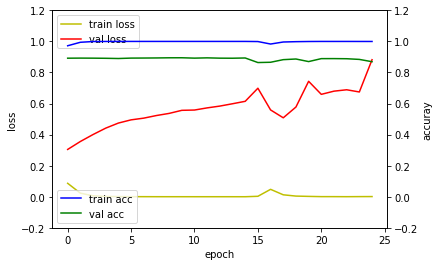

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [12]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)
# 한 번도 사용하지 않은 테스트 셋으로 모델의 성능을 측정합니다.

25000/25000 [==============================] - 18s 732us/step
## evaluation loss and_metrics ##
[0.9680549689674377, 0.8574000000190735]
